In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train.Item_Weight.fillna(train.Item_Weight.mean(),inplace=True)
train.Outlet_Size.fillna(train.Outlet_Size.mode()[0],inplace=True)

In [9]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:xlabel='Item_Outlet_Sales'>

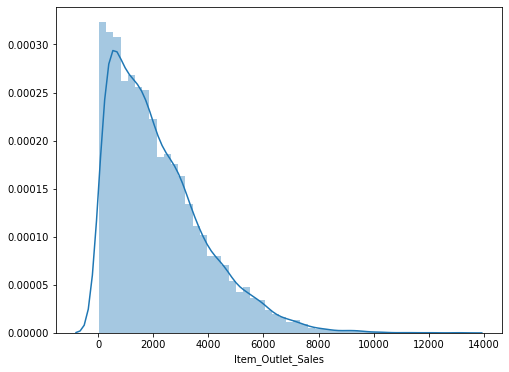

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Weight'>

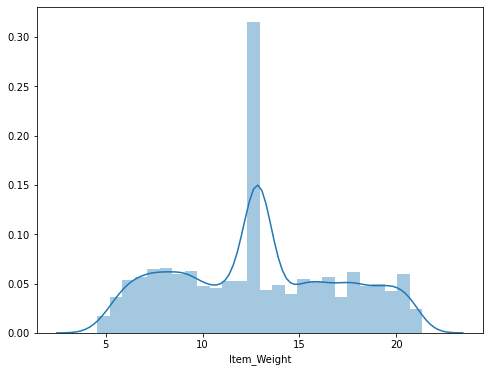

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(train['Item_Weight'])

<Figure size 576x432 with 0 Axes>

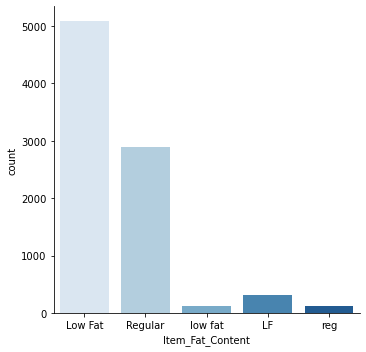

In [12]:
plt.figure(figsize=(8,6))
sns.catplot(x='Item_Fat_Content',kind='count',palette='Blues',data=train)

<AxesSubplot:xlabel='Item_Visibility'>

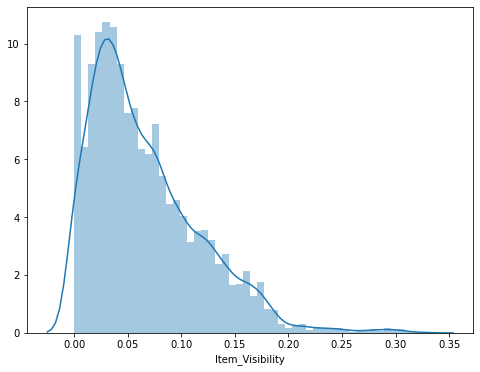

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(train['Item_Visibility'])

<Figure size 576x432 with 0 Axes>

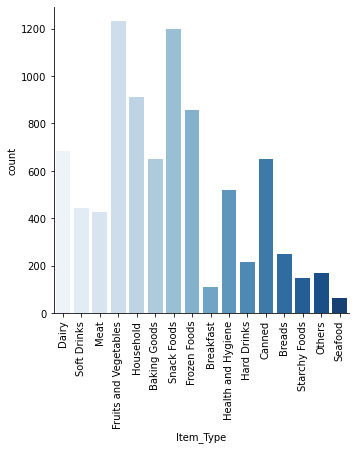

In [14]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='Item_Type',kind='count',palette='Blues',data=train)
g.set_xticklabels(rotation=90)

<AxesSubplot:xlabel='Item_MRP'>

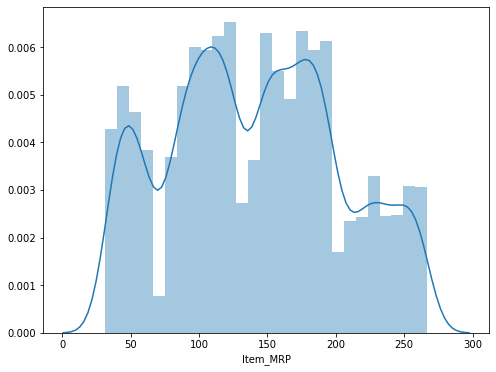

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(train['Item_MRP'])

<Figure size 576x432 with 0 Axes>

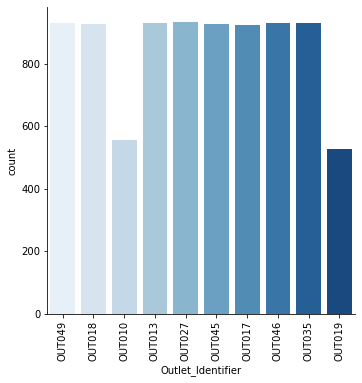

In [16]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='Outlet_Identifier',kind='count',palette='Blues',data=train)
g.set_xticklabels(rotation=90)

<Figure size 576x432 with 0 Axes>

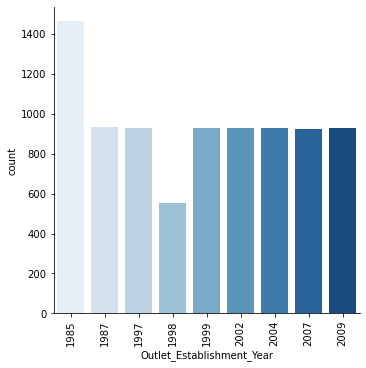

In [17]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='Outlet_Establishment_Year',kind='count',palette='Blues',data=train)
g.set_xticklabels(rotation=90)

<Figure size 576x432 with 0 Axes>

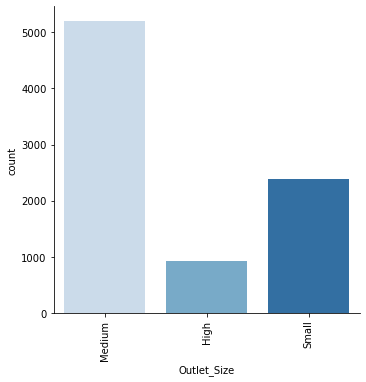

In [18]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='Outlet_Size',kind='count',palette='Blues',data=train)
g.set_xticklabels(rotation=90)

<Figure size 576x432 with 0 Axes>

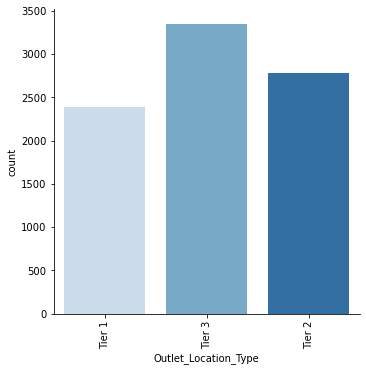

In [19]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='Outlet_Location_Type',kind='count',palette='Blues',data=train)
g.set_xticklabels(rotation=90)

<Figure size 576x432 with 0 Axes>

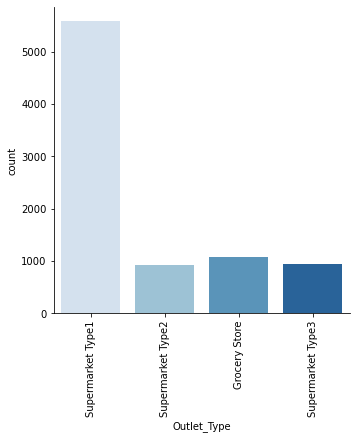

In [20]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='Outlet_Type',kind='count',palette='Blues',data=train)
g.set_xticklabels(rotation=90)

In [21]:
train.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [22]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


Normalization of sales

If tail is on the right as that of the second image in the figure, it is right skewed data. It is also called positive skewed data.
Common transformations of this data include square root, cube root, and log.

Negatively skewed data:
If the tail is to the left of data, then it is called left skewed data. It is also called negatively skewed data.
Common transformations include square , cube root and logarithmic.

--SaiGayatri Vadali, 2017, "Day 8: Data transformation — Skewness, normalization and much more".

In [23]:
train['cube_sales'] = np.cbrt(train['Item_Outlet_Sales'])
train[['Item_Outlet_Sales','cube_sales']].head()

,Item_Outlet_Sales,cube_sales
0,3735.1380,15.515611
1,443.4228,7.625576
2,2097.2700,12.800240
3,732.3800,9.013888
4,994.7052,9.982319


<AxesSubplot:xlabel='cube_sales'>

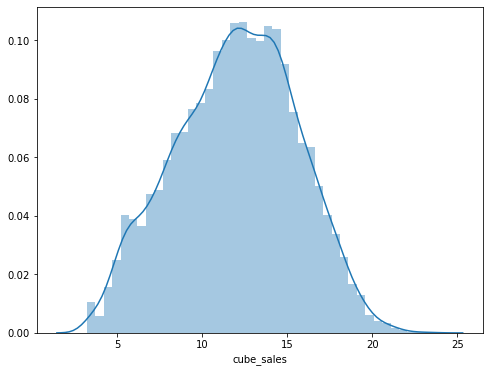

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(train['cube_sales'])

Encode the categorical variables

In [25]:
le = LabelEncoder()

for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])

train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cube_sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380,15.515611
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228,7.625576
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700,12.800240
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800,9.013888
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052,9.982319


In [26]:
train['Outlet_Establishment_Year'] = le.fit_transform(train['Outlet_Establishment_Year'])
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cube_sales
0,9.30,1,0.016047,4,249.8092,4,1,0,1,3735.1380,15.515611
1,5.92,2,0.019278,14,48.2692,8,1,2,2,443.4228,7.625576
2,17.50,1,0.016760,10,141.6180,4,1,0,1,2097.2700,12.800240
3,19.20,2,0.000000,6,182.0950,3,1,2,0,732.3800,9.013888
4,8.93,1,0.000000,9,53.8614,1,0,2,1,994.7052,9.982319


Building models

In [27]:
X = train.drop(columns=['Item_Outlet_Sales','cube_sales'],axis=1)
y = train['cube_sales']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [88]:
# build random forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

2.0567374220257135

In [35]:
# acquire the important features
importance = pd.DataFrame(rfr.feature_importances_,
                          index = X_train.columns,
                          columns = ['importance']).sort_values('importance',ascending=False)
importance

,importance
Item_MRP,0.412081
Outlet_Type,0.357121
Item_Visibility,0.078858
Item_Weight,0.049755
Outlet_Establishment_Year,0.037909
Item_Type,0.034625
Item_Fat_Content,0.013139
Outlet_Size,0.008479
Outlet_Location_Type,0.008032


In [107]:
X1 = train[['Item_MRP','Outlet_Type','Item_Visibility']]
y = train['cube_sales']

In [108]:
X1_train, X1_test, y_train, y_test = train_test_split(X1,y, test_size = 0.3, random_state=42)

In [110]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, y_train)
pred1 = rf1.predict(X1_test)

rmse1 = np.sqrt(mean_squared_error(y_test, pred1))
rmse1

2.130314630905486

In [111]:
lr1 = LinearRegression()

lr1.fit(X1_train, y_train)
pred_lr1 = lr1.predict(X1_test)
rmse_lr1 = np.sqrt(mean_squared_error(y_test, pred_lr1))
rmse_lr1

2.4582501360725986

In [113]:
knn1 = KNeighborsRegressor(n_neighbors=7)
knn1.fit(X1_train, y_train)
pred_knn1 = knn1.predict(X1_test)
rmse_knn1 = np.sqrt(mean_squared_error(y_test, pred_knn1))
rmse_knn1

2.2000690089045523

In [115]:
svr1 = SVR(kernel='rbf', C=5)

svr1.fit(X1_train, y_train)
pred_svr1 = svr1.predict(X1_test)
rmse_svr1 = np.sqrt(mean_squared_error(y_test, pred_svr1))
rmse_svr1

2.7991027432113773

### **Scaling - normalize the data that the range of all the varibales is almost similar**

*Normalization*

min-max scale the data between 0 and 1
minmax_scaling(data, columns=[0])

*Standardization*

StandardScaler function

In [ ]:
# scaled_train = minmax_scaling(train, columns=[0])

In [118]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler().fit(X1_train)
X1_train_norm = mms.transform(X1_train)
X1_test_norm = mms.transform(X1_test)

In [119]:
pd.DataFrame(X1_train_norm).describe()

,0,1,2
count,5966.000000,5966.000000,5966.000000
mean,0.469121,0.403341,0.200436
std,0.265824,0.266535,0.155586
min,0.000000,0.000000,0.000000
25%,0.266786,0.333333,0.082164
50%,0.477889,0.333333,0.164203
75%,0.659306,0.333333,0.287309
max,1.000000,1.000000,1.000000


In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X1_train)

X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

pd.DataFrame(X1_train_scaled).describe()

,0,1,2
count,5.966000e+03,5.966000e+03,5.966000e+03
mean,1.262446e-16,1.286266e-16,-3.811158e-17
std,1.000084e+00,1.000084e+00,1.000084e+00
min,-1.764933e+00,-1.513401e+00,-1.288373e+00
25%,-7.612296e-01,-2.626807e-01,-7.602351e-01
50%,3.298595e-02,-2.626807e-01,-2.328952e-01
75%,7.155137e-01,-2.626807e-01,5.584134e-01
max,1.997276e+00,2.238761e+00,5.139495e+00


In [122]:
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
rmse = []

trainX = [X1_train, X1_train_norm, X1_train_scaled]
testX = [X1_test, X1_test_norm, X1_test_scaled]

for i in range(len(trainX)):
    lr.fit(trainX[i], y_train)
    pred = lr.predict(testX[i])
    
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

df_lr = pd.DataFrame({'RMSE': rmse}, index=['Original','Normalization','Standardization'])
df_lr

,RMSE
Original,2.45825
Normalization,2.45825
Standardization,2.45825


In [123]:

knn = KNeighborsRegressor(n_neighbors=7)
rmse = []

for i in range(len(trainX)):
    knn.fit(trainX[i], y_train)
    pred = knn.predict(testX[i])
    
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

df_knn = pd.DataFrame({'RMSE': rmse}, index=['Original','Normalization','Standardization'])
df_knn

,RMSE
Original,2.200069
Normalization,2.030939
Standardization,2.033199


In [124]:
rfr = RandomForestRegressor()
rmse = []

for i in range(len(trainX)):
    rfr.fit(trainX[i], y_train)
    pred = rfr.predict(testX[i])
    
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

df_rfr = pd.DataFrame({'RMSE': rmse}, index=['Original','Normalization','Standardization'])
df_rfr

,RMSE
Original,2.126970
Normalization,2.128982
Standardization,2.125129


In [126]:
svr = SVR(kernel='rbf', C=5)

rmse = []

for i in range(len(trainX)):
    svr.fit(trainX[i], y_train)
    pred = svr.predict(testX[i])
    
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

df_svr = pd.DataFrame({'RMSE': rmse}, index=['Original','Normalization','Standardization'])
df_svr

,RMSE
Original,2.799103
Normalization,1.954164
Standardization,1.959196
